# Predicting heart disease using maching learning

This notebook looks into using various python based machine learning and data science 
librarires in an attempt to build a machine learning model capable of predicting whether or
not someone has heart disease based on their medical attributes

We are going take following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement,
>Given clinical parameters about a patient,can we predict wheather or not they have heart disease or not

## 2. Data
The original data came from the cleaveland data from the machine learning UCI Machine learning repository.https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There also version of it available on kaggle.https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Features
> If we can reach 95% accuracy at predicting wheater or not patient has heart disease during the proof of concept we will pursue the project

## 4. Evaluation

This is where you will get different information about each of the features in our data
**Create a data dictionary**

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   serum = LDL + HDL + .2 * triglycerides
   above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   0: Nothing to note
   1: ST-T Wave abnormality
       can range from mild symptoms to severe problems
       signals non-normal heart beat
   2: Possible or definite left ventricular hypertrophy
      Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
     0: Upsloping: better heart rate with excercise (uncommon)
     1: Flatsloping: minimal change (typical healthy heart)
     2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Preparing the tools
We are going to use pandas ,Matplotlib and Numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from scikit.learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model eavaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

# Data exploration(exploratory data analysis or eda)
The goal here is to find out the data and becomes a subject matter expert on the dataset you are working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it
4. Where are the outliers and why you should care about about them
5. How can you add,change or remove features to get more of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

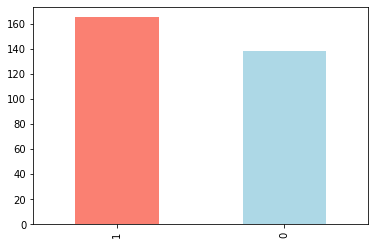

In [6]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon","lightblue"]);

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


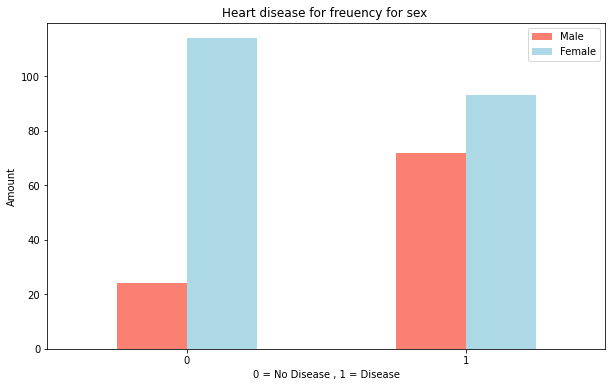

In [10]:
pd.crosstab(df["target"],df["sex"]).plot(kind = "bar",color = ["salmon","lightblue"],figsize = (10,6));
plt.legend(["Male","Female"]);
plt.title("Heart disease for freuency for sex ")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount");
plt.xticks(rotation = 0);

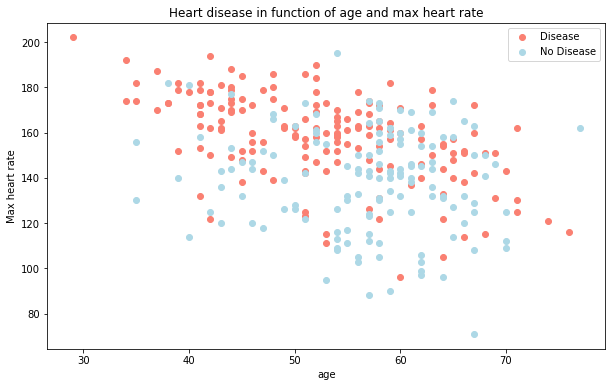

In [11]:
# Avg vs Max heart rate for Heart disease

# Create another figure
plt.figure(figsize = (10,6))

# scatter with positive example
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon");

# scatter with negative example
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue");

plt.xlabel("age")
plt.ylabel("Max heart rate")
plt.title("Heart disease in function of age and max heart rate")
plt.legend(["Disease","No Disease"]);

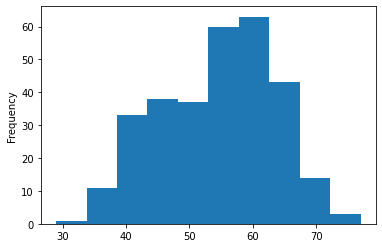

In [12]:
# Check the distribution of age column with histogram
df.age.plot.hist();

In [13]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


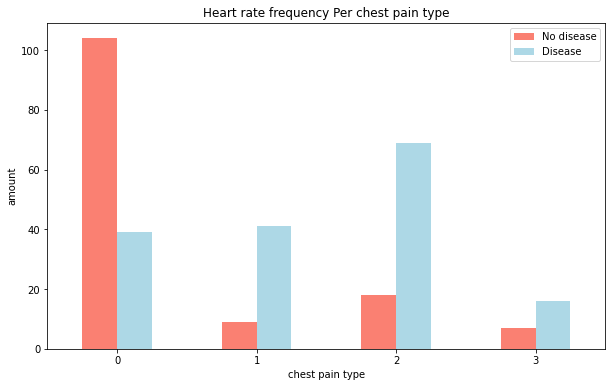

In [14]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                  figsize = (10,6),
                                color = (["salmon","lightblue"]))
plt.title("Heart rate frequency Per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation = 0);

In [15]:
# Make a correrelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


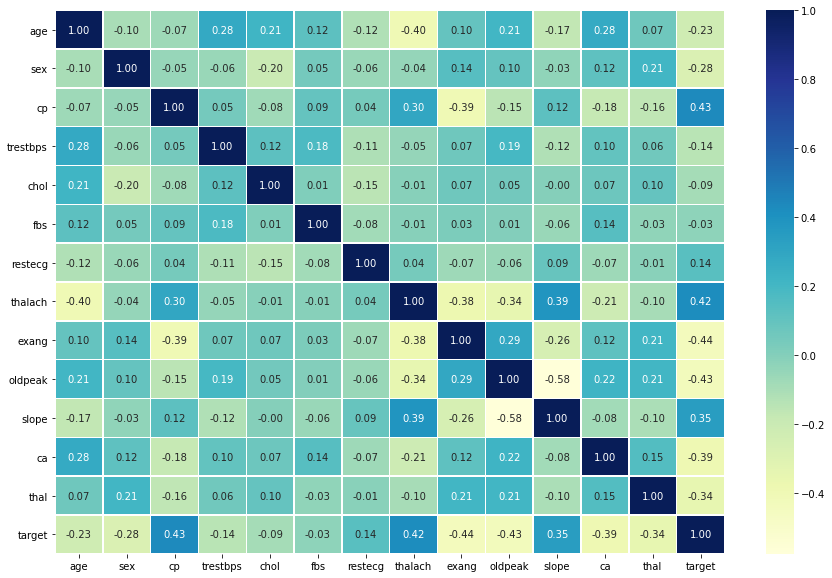

In [16]:
# Let's make correlation preetier
corr_mattrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mattrix,
                 annot = True,
                 linewidths = 0.5,
                  fmt = ".2f",
                  cmap = "YlGnBu");

# 5.Modelling

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [19]:
# Split the data

X = df.drop("target",axis = 1)
Y = df["target"]

In [20]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# split the data into train and test split

np.random.seed(42)
# Split the data into train and test split
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size = 0.2)

Now we got our data split into training and test split it's time to build machine learning model 

We will train it (find the patterns) on the training set

and we will test it (use the pattern) on the test set

We are going to try 3 different machine learning models:
1. Logistic Regression
2. k-Nearest Neighbours Classifier
3. RandomForestClassifier

In [23]:
# Puts model in a dictionary

models = {"Logistic Regression":LogisticRegression(),
         "k-Nearest Neighbours Classifier": KNeighborsClassifier(),
         "RandomForesrtClassifier":RandomForestClassifier()}

def fit_score(model,X_test,X_train,Y_train,Y_test):
    """
    Fits and evaluate given machine learning model.
    models: a dict of different scikit machine learning models
    X_train: training of data(no label)
    X_test: testing of data
    Y_train: training label
    Y_test: testing label
    """
    # set random seed
    np.random.seed(42)

    # Make a dictionary model
    model_score = {}

    # Loop through the model
    for name,model in models.items():
         # Fit the model
        model.fit(X_train,Y_train)
        # Evaluate the model and append its score in model score
        model_score[name] = model.score(X_test,Y_test)
    return model_score

In [24]:
model_scores = fit_score(model = models,
                          X_train = X_train,
                          X_test = X_test,
                          Y_train = Y_train,
                          Y_test = Y_test)
model_scores

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'k-Nearest Neighbours Classifier': 0.6885245901639344,
 'RandomForesrtClassifier': 0.8360655737704918}

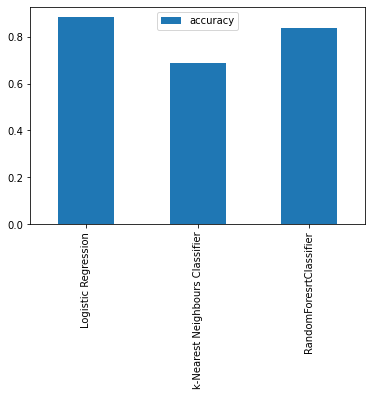

In [25]:
model_compare = pd.DataFrame(model_scores,index = ["accuracy"])
model_compare.T.plot.bar()

Now we have got a baseline model.. and we know model first prediction aren't always what we should based our next step off.
What should do?

Let's look at the following:
* Hyperparametr tunning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification_report
* ROC curve
* Area under curve(AUC)

## Hyperparameter tunning

In [26]:
# Let's tune knn

train_scores = []
test_scores = []

# Create diff values of n_neighbors
neighbors = range(1,21)

# Set up knn instance
knn = KNeighborsClassifier()

# Loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,Y_train)
    
    # Update the training score
    train_scores.append(knn.score(X_train,Y_train))
    
    # Update the test score
    test_scores.append(knn.score(X_test,Y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum knn score on the test data:75.41%


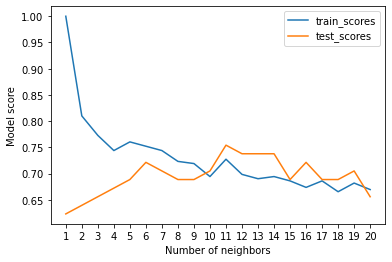

In [29]:
plt.plot(neighbors,train_scores,label = "train_scores")
plt.plot(neighbors,test_scores,label = "test_scores")
plt.xticks(np.arange(1 ,21 ,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum knn score on the test data:{max(test_scores)*100:.2f}%")

# Hyperparameter tuning Randomized search CV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

using RandiomizedSearchCV

In [30]:
# Create a hyperparameter grid for logisticRegression

log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestRegression
rf_grid = {"n_estimators":np.arange(10,1000,50),
            "max_depth":[None, 3, 5, 10],
            "min_samples_split":np.arange(2, 20, 2),
            "min_samples_leaf":np.arange(1, 20, 2)}

now we hav we have got hyperparameter grid setup for each of our models, let's tune them using RandomizedSearchCV...

In [31]:
# Tune logistic regresion
np.random.seed(42)

# Setup random hyperparameter search for logistic regresion
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [34]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'k-Nearest Neighbours Classifier': 0.6885245901639344,
 'RandomForesrtClassifier': 0.8360655737704918}

In [35]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
rs_rf.score(X_train,Y_train)

0.8553719008264463

In [38]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'k-Nearest Neighbours Classifier': 0.6885245901639344,
 'RandomForesrtClassifier': 0.8360655737704918}

* by hand
* RandomizedSearchCV
* GridSearchCV

# Hyperparameter tuning using Grid search CV

since our logistic regresion model provides best scores so far we will try and improve them using grid search cv

In [39]:
# Different hyperparameter model using GridSearchCV
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}
# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

# Evaluating our tuned ,achine learning classifier ,beyond accuracy
* ROC curve and AUC score
* confussion matrix
* classification report
* Precision
* Recall
* F-1 Score

** and it would be great if cross-validation was used where possible

To make comparison and evaluate our trained model,first we need to make our prediction

In [42]:
y_preds = gs_log_reg.predict(X_test)

In [43]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

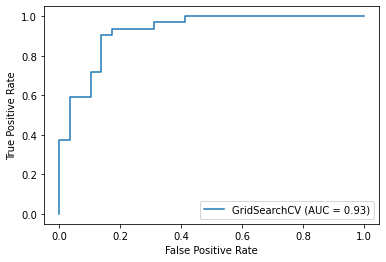

In [45]:
# Plot ROC curve and calculate AUC metrics
plot_roc_curve(gs_log_reg,X_test,Y_test);

In [46]:
# confusion matrix
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


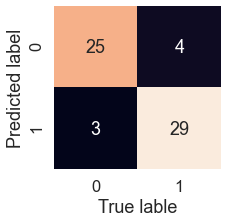

In [47]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plot a nice looking confusion matrix using seaborn heatmap()
    """
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True lable")
    plt.ylabel("Predicted label")
    
plot_conf_mat(Y_test,y_preds)

Now we have got a ROC curve and AUC metrics and a confusion matrix,let's get a classification report as well as cross validation precison,recall and F-1score.

In [48]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using cross validation 
We are going to calculate precision,recall and f1 score of our model using cross validation and to do so we will be using cross_val_score()


In [49]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Create a new classifier with best hyperparameters

clf =LogisticRegression(C =  0.20433597178569418,
                        solver = "liblinear")


In [51]:
# Cross_validation_accuracy
cv_acc = cross_val_score(clf,
                            X,
                            Y,
                            cv = 5,
                            scoring = "accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [52]:
# cross_validation_precision
cv_precision = cross_val_score(clf,
                            X,
                            Y,
                            cv = 5,
                            scoring = "precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [53]:
# cross_validation_f1
cv_f1 = cross_val_score(clf,
                            X,
                            Y,
                            cv = 5,
                            scoring = "f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [54]:
# cross_validation_recall
cv_recall = cross_val_score(clf,
                            X,
                            Y,
                            cv = 5,
                            scoring = "recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

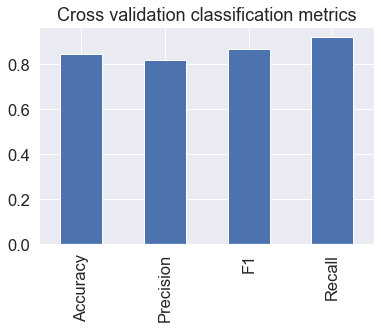

In [55]:
# Visualize cross validation score
cv_metrics = pd.DataFrame({ "Accuracy":cv_acc,
                            "Precision":cv_precision,
                             "F1":cv_f1,
                             "Recall":cv_recall},
                             index=[0])
           
cv_metrics.T.plot.bar(title = "Cross validation classification metrics",
                      legend = False);

# Feature Importance
Feature importance is another as asking , which features contribute most to the outcomes  of the model and how do they contribute?

Finding feature importance is different for each machine learning model  one way to find geature importance is to search for{MODEL NAME} feature importance.

Lett's find feature importance of logistic regression model

In [56]:
# Fit an instance of logistic regression
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")
clf.fit(X_train,Y_train);

In [57]:
# check coef
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [58]:
# Match coef of different features to column
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

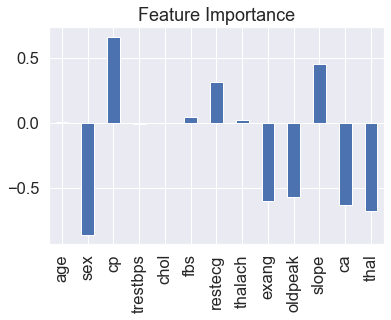

In [59]:
features_df = pd.DataFrame(features_dict, index = [0])
features_df.T.plot.bar(title = "Feature Importance",legend = False)

In [60]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [61]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope - the slope of peak exercise ST segment
0. Upsloping :better heart rate with exercise(uncommon)
1. Flatsloping: minimal changes (typical heart rate)
2. Downsloping: Sign of unhealthy heart

# 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?